# Table of Contents

## [1. What is Clustering?](#1)
## [2. Applications of clustering](#2)
## [3. 5 Popular clustetering techniques](#3)
### [3.1 K Means](#4)
### [3.2 Mean Shift](#5)
### [3.3 DBSCAN](#6)
### [3.4 Gaussian Mixture Models](#7)
### [3.5  Agglomerative Hierarchical Clustering](#8)
## [4. Overfitting in Unsupervised Learning](#9)
## [5. Performance Metrics for clustering](#10)
### [5.1 Silhouette Coefficient](#11)
### [5.2 Variance Ratio Criterion](#12)
### [5.3 Davies-Bouldin Index](#13)
## [6. Data pre-processing](#14)
## [7. Viewing clusters with more than 2 dimensional data](#15)

# What is Clustering? <a class="anchor" id="1"></a>
Clustering is an unsupervisied learning algorithm.
The goal is to group similar instances together into clusters. Clustering is a great
tool for data analysis, customer segmentation, recommender systems, search
engines, image segmentation, semi-supervised learning, dimensionality reduction,
and more.

There is no universal definition of what a cluster is: it really depends on the context,
and different algorithms will capture different kinds of clusters. Some algorithms
look for instances centered around a particular point, called a centroid. Others look
for continuous regions of densely packed instances: these clusters can take on any
shape. Some algorithms are hierarchical, looking for clusters of clusters. And the list
goes on.

# Applications of clustering <a class="anchor" id="2"></a>

Typical examples where clustering arises are:

1. Newspaper articles: cluster them into articles of similar topics.
2. Medicine: cluster patients into groups with similar symptoms.
3. Social network: cluster into different communities.
4. Marketing: cluster customers into groups of similar buying habits.
5. Images: cluster into groups with specific contents.

# 5 Popular clustering algorithms <a class="anchor" id="3"></a>

Source: https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

## 1. K Means <a class="anchor" id="4"></a>

Source: https://en.wikipedia.org/wiki/K-means_clustering

It is based on
minimizing the pairwise distance of data points within the same cluster(within-cluster sum of squares (WCSS)).We will just start by placing the centroids randomly (e.g., by picking k instances at
random and using their locations as centroids). Then label the instances, update the
centroids, label the instances, update the centroids, and so on until the centroids stop
moving. The algorithm is guaranteed to converge in a finite number of steps (usually
quite small).

Algorithm:

1. To begin, we first select a number of classes/groups to use and randomly initialize their respective center points.
2. Each data point is classified by computing the distance between that point and each group center, and then classifying the point to be in the group whose center is closest to it.
3. Based on these classified points, we recompute the group center by taking the mean of all the vectors in the group.
4. Repeat these steps for a set number of iterations or until the group centers don’t change much between iterations. You can also opt to randomly initialize the group centers a few times, and then select the run that looks like it provided the best results.

<b> Animation: </b>
<img src="https://miro.medium.com/max/648/1*KrcZK0xYgTa4qFrVr0fO2w.gif">

### Cost Function:

Formally, given x1, . . . , xn ∈ $R^{d}$, we partition these points into k clusters C1, . . . , Ck based on the objective:

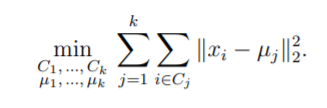

It is also referred to as Lloyd's algorithm. It performs EM (expectation maximization) to find the optimal solution.

1. Assignment step: For fixed cluster centroids, assign each observation to the cluster with the nearest mean: that with the least squared Euclidean distance

2. Update step: Recalculate means (centroids) for observations assigned to each cluster.

The "assignment" step is referred to as the "expectation step", while the "update step" is a maximization step, making this algorithm a variant of the generalized expectation-maximization algorithm.

The algorithm has converged when the assignments no longer change. The algorithm does not guarantee to find the optimum.

### KMeans++:

Although the K Means algorithm is guaranteed to converge, it may not converge to the right
solution (i.e., it may converge to a local optimum): whether it does or not depends on
the centroid initialization.

An important improvement to the K-Means algorithm is K-Means++. A smarter
initialization step is introduced such that it tends to select centroids that are distant from one another, and
this improvement makes the K-Means algorithm much less likely to converge to a
suboptimal solution.

### Selecting optimal 'K'

There are 2 ways to identify optimal clusters:
1. Elbow method
2. Silhoutte score 


#### 1. Elbow method

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE)  between data points and their assigned clusters’ centroids. We pick k at the spot where SSE starts to flatten out and forming an elbow. 

Model’s inertia is the mean squared distance between each instance and its closest centroid.

<img src="https://miro.medium.com/max/585/1*9z8erk4kvsnxkfv-QhsHZg.png">

A more precise approach (but also more computationally expensive) is to use the
silhouette score, which is the mean silhouette coefficient over all the instances.

#### 2. Silhouette Coefficient

Source: 

- https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
- https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
 

The Silhouette Coefficient s for a single sample is then given as:

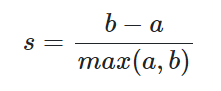

- a: The mean distance between a sample and all other points in the same class.

- b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

The coefficient can take values in the interval [-1, 1].

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters.

### Assumptions about data

Source: https://s3.amazonaws.com/assets.datacamp.com/production/course_10628/slides/chapter3.pdf

- Symmetric distribution of variables (not skewed)
- Variables with same average values
- Variables with same variance


### Pros vs Cons

<b> Pros: </b>

1. Scales to large data sets.
2. Relatively simple to implement.
3. fast and efficient in terms of computational cost
4. easy to interpret the clustering results

<b> Cons: </b>

1. Kmeans assumes spherical shapes of clusters (with radius equal to the distance between the centroid and the furthest data point) and doesn’t work well when clusters are in different shapes such as elliptical clusters.
2. Being dependent on initial values.
3. Clustering data of varying sizes and density.
4. Clustering outliers- Centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Consider removing or clipping outliers before clustering.
5. Scaling with number of dimensions - As the number of dimensions increases, a distance-based similarity measure converges to a constant value between any given examples. Reduce dimensionality either by using PCA on the feature data, or by using “spectral clustering” to modify the clustering algorithm as explained below.

## 2. Mean-Shift Clustering <a class="anchor" id="5"></a>

Source: 
- https://towardsdatascience.com/machine-learning-algorithms-part-13-mean-shift-clustering-example-in-python-4d6452720b00
- https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_clustering_algorithms_mean_shift.htm

Unlike K-means clustering, it does not make any assumptions; hence it is a non-parametric algorithm.

Mean-shift algorithm basically assigns the datapoints to the clusters iteratively by shifting points towards the highest density of datapoints i.e. cluster centroid.

The difference between K-Means algorithm and Mean-Shift is that later one does not need to specify the number of clusters in advance because the number of clusters will be determined by the algorithm w.r.t data.

<b>Algorithm:</b>

1. Define a window (bandwidth of the kernel) and place the window on a data point
<img src="https://miro.medium.com/max/772/1*0l-sKe3isb_y7dCfyoFT1A.png" width=300>

2. Calculate the mean for all the points in the window
<img src="https://miro.medium.com/max/806/1*lGVU-5EjIzMJJyMFqhac5Q.png" width=300>

3. Move the center of the window to the location of the mean
<img src="https://miro.medium.com/max/778/1*xsatowugNSNOmmWbh2BwiQ.png" width=300>

4. Repeat steps 2 and 3 until there is convergence
<img src="https://miro.medium.com/max/790/1*m9o3-2sYoozPs3HdFiczog.png" width=300>

<b> Animation: </b>
<img src="https://miro.medium.com/max/437/1*bkFlVrrm4HACGfUzeBnErw.gif">

The fact that the cluster centers converge towards the points of maximum density is also quite desirable as it is quite intuitive to understand and fits well in a naturally data-driven sense. The drawback is that the selection of the window size/radius “r” can be non-trivial.

<b> Summary: </b>

1. We begin with a circular sliding window centered at a point C (randomly selected) and having radius r as the kernel. Mean shift is a hill-climbing algorithm that involves shifting this kernel iteratively to a higher density region on each step until convergence.

2. At every iteration, the sliding window is shifted towards regions of higher density by shifting the center point to the mean of the points within the window (hence the name). The density within the sliding window is proportional to the number of points inside it. Naturally, by shifting to the mean of the points in the window it will gradually move towards areas of higher point density.

3. We continue shifting the sliding window according to the mean until there is no direction at which a shift can accommodate more points inside the kernel. We keep moving the circle until we no longer are increasing the density (i.e number of points in the window).

4. This process of steps 1 to 3 is done with many sliding windows until all points lie within a window. When multiple sliding windows overlap the window containing the most points is preserved. The data points are then clustered according to the sliding window in which they reside.

### Assumptions:

It makes no assumptions about the data.

### Cost Function:


### Pros vs Cons:

<b>Pros:</b>

1. It does not need to make any model assumption as like in K-means or Gaussian mixture.

2. It can also model the complex clusters which have nonconvex shape.

3. It only needs one parameter named bandwidth which automatically determines the number of clusters.

4. There is no issue of local minima as like in K-means.

5. No problem generated from outliers.

<b>Cons:</b>

1. Mean-shift algorithm does not work well in case of high dimension, where number of clusters changes abruptly.

2. We do not have any direct control on the number of clusters but in some applications, we need a specific number of clusters.

3. It cannot differentiate between meaningful and meaningless modes.

## 3. DBSCAN <a class="anchor" id="6"></a>

Source:
- https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/
- https://en.wikipedia.org/wiki/DBSCAN 

It is a density-based clustering non-parametric algorithm (similar to mean-shift, but with a couple of notable advantages) : given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away).

DBSCAN algorithm requires two parameters –

- eps : It defines the neighborhood around a data point i.e. if the distance between two points is lower or equal to ‘eps’ then they are considered as neighbors. If the eps value is chosen too small then large part of the data will be considered as outliers. If it is chosen very large then the clusters will merge and majority of the data points will be in the same clusters. One way to find the eps value is based on the k-distance graph.

- MinPts: Minimum number of neighbors (data points) within eps radius. Larger the dataset, the larger value of MinPts must be chosen. As a general rule, the minimum MinPts can be derived from the number of dimensions D in the dataset as, MinPts >= D+1. The minimum value of MinPts must be chosen at least 3.

In this algorithm, we have 3 types of data points.

1. Core Point: A point is a core point if it has more than MinPts points within eps.
2. Border Point: A point which has fewer than MinPts within eps but it is in the neighborhood of a core point.
3. Noise or outlier: A point which is not a core point or border point.

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190418023034/781ff66c-b380-4a78-af25-80507ed6ff26.jpeg">

<b> Algorithm: </b>

1. DBSCAN begins with an arbitrary starting data point that has not been visited. The neighborhood of this point is extracted using a distance epsilon ε (All points which are within the ε distance are neighborhood points).

2. If there are a sufficient number of points (according to minPoints) within this neighborhood then the clustering process starts and the current data point becomes the first point in the new cluster. Otherwise, the point will be labeled as noise (later this noisy point might become the part of the cluster). In both cases that point is marked as “visited”.

3. For this first point in the new cluster, the points within its ε distance neighborhood also become part of the same cluster. This procedure of making all points in the ε neighborhood belong to the same cluster is then repeated for all of the new points that have been just added to the cluster group.

4. This process of steps 2 and 3 is repeated until all points in the cluster are determined i.e all points within the ε neighborhood of the cluster have been visited and labeled.

5. Once we’re done with the current cluster, a new unvisited point is retrieved and processed, leading to the discovery of a further cluster or noise. This process repeats until all points are marked as visited. Since at the end of this all points have been visited, each point will have been marked as either belonging to a cluster or being noise.

<b> Animation: </b>
<img src="https://dashee87.github.io/images/DBSCAN_tutorial.gif">


### Data pre-processing

Source: https://www.geeksforgeeks.org/implementing-dbscan-algorithm-using-sklearn/

Note: It is important to normalize values because it makes it easier to find an appropriate distance for radius of neighborhood (eps).

### Pros and Cons:

Source: https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556

<b>Pros:</b>
1. Does not require to specify number of clusters beforehand.
2. Performs well with arbitrary shapes clusters.
3. DBSCAN is robust to outliers and able to detect the outliers.

<b>Cons:</b>
1. The quality of DBSCAN depends on the distance measure used in the function regionQuery(P,ε). The most common distance metric used is Euclidean distance. Especially for high-dimensional data, this metric can be rendered almost useless due to the so-called "Curse of dimensionality", making it difficult to find an appropriate value for ε. This effect, however, is also present in any other algorithm based on Euclidean distance.
2. DBSCAN cannot cluster data sets well with large differences in densities, since the minPts-ε combination cannot then be chosen appropriately for all clusters.
3. If the data and scale are not well understood, choosing a meaningful distance threshold ε can be difficult.

## 4. Gaussian Mixture Models (GMM) <a class="anchor" id="7"></a>

Source: https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95

One important characteristic of K-means is that it is a hard clustering method, which means that it will associate each point to one and only one cluster. A limitation to this approach is that there is no uncertainty measure or probability that tells us how much a data point is associated with a specific cluster. So what about using a soft clustering instead of a hard one? This is exactly what Gaussian Mixture Models, or simply GMMs, attempt to do.

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the
instances were generated from a mixture of several Gaussian distributions whose
parameters are unknown. 

With GMMs we assume that the data points are Gaussian distributed;this way we have two parameters to describe the shape of the clusters: the mean and the standard deviation! 

### Algorithm:
To find the parameters of the Gaussian for each cluster (e.g the mean and standard deviation), we will use an optimization algorithm called Expectation–Maximization (EM). 

1. We begin by selecting the number of clusters (like K-Means does) and randomly initializing the Gaussian distribution parameters for each cluster. 
2. Given these Gaussian distributions for each cluster, compute the probability that each data point belongs to a particular cluster. The closer a point is to the Gaussian’s center, the more likely it belongs to that cluster. This should make intuitive sense since with a Gaussian distribution we are assuming that most of the data lies closer to the center of the cluster.
3. Based on these probabilities, we compute a new set of parameters for the Gaussian distributions such that we maximize the probabilities of data points within the clusters. We compute these new parameters using a weighted sum of the data point positions, where the weights are the probabilities of the data point belonging in that particular cluster.
4. Steps 2 and 3 are repeated iteratively until convergence, where the distributions don’t change much from iteration to iteration.


### What is Expectation Maximization? 

Source: https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

Expectation-Maximization (EM) is a statistical algorithm for finding the right model parameters. We typically use EM when the data has missing values, or in other words, when the data is incomplete.

### EM in Gaussian Mixture Models:

Let’s say we need to assign k number of clusters. This means that there are k Gaussian distributions, with the mean and covariance values to be μ1, μ2, .. μk and Σ1, Σ2, .. Σk . Additionally, there is another parameter for the distribution that defines the number of points for the distribution. Or in other words, the density of the distribution is represented with Πi.

Now, we need to find the values for these parameters to define the Gaussian distributions. We already decided the number of clusters, and randomly assigned the values for the mean, covariance, and density. Next, we’ll perform the E-step and the M-step!

<b>E-step:</b>
For each point xi, calculate the probability that it belongs to cluster/distribution c1, c2, … ck. This is done using the below formula:
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/10/probab_gmm_1.png">
This value will be high when the point is assigned to the right cluster and lower otherwise.

<b>M-step:</b>
Post the E-step, we go back and update the Π, μ and Σ values. These are updated in the following manner:

1. The new density is defined by the ratio of the number of points in the cluster and the total number of points:
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/10/mean-formula-gmm.png">

2. The mean and the covariance matrix are updated based on the values assigned to the distribution, in proportion with the probability values for the data point. Hence, a data point that has a higher probability of being a part of that distribution will contribute a larger portion:
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/10/formulas-gmm-e1571990956378-300x128.png">

Based on the updated values generated from this step, we calculate the new probabilities for each data point and update the values iteratively. This process is repeated in order to maximize the log-likelihood function.

### Assumptions:

Source: https://stats.stackexchange.com/questions/371333/is-it-important-to-make-a-feature-scaling-before-using-gaussian-mixture-model

Gaussian Mixture Modelling explicitly relaxes both the assumption that K Means has - i.e. All clusters have the same variance, and the assumption of no correlation of features within a cluster, and that's why you don't need to standardise your features.

To be clear, the real advantage to using Gaussian Mixture Models is that your clusters don't have to be hyper-spherical and of the same radius. The fact that you also don't have to standardise your variables is just a nice bonus

### Pros vs Cons:

<b> Pros:</b>

1. GMMs are a lot more flexible in terms of cluster covariance than K-Means; due to the standard deviation parameter, the clusters can take on any ellipse shape, rather than being restricted to circles.
2. Since GMMs use probabilities, they can have multiple clusters per data point. So if a data point is in the middle of two overlapping clusters, we can simply define its class by saying it belongs X-percent to class 1 and Y-percent to class 2. I.e GMMs support mixed membership.

<b> Cons:</b>

1. When there are many dimensions, or many clusters, or few instances, EM can struggle to converge to the optimal solution. One way to solve this is to limit the range of shapes and orientations that the clusters can have. This can be achieved by imposing constraints on the covariance matrices. To do this, set the covariance_type hyperparameter to one of the following values:


- "spherical" - All clusters must be spherical, but they can have different diameters (i.e., different variances).

- "diag"-Clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes must be parallel to the coordinate axes (i.e., the covariance matrices must be diagonal).

- "tied"- All clusters must have the same ellipsoidal shape, size, and orientation (i.e., all clusters share the same covariance matrix).

By default, covariance_type is equal to "full", which means that each cluster can take on any shape, size, and orientation (it has its own unconstrained covariance matrix).

## 5. Agglomerative Hierarchical Clustering <a class="anchor" id="8"></a>

Hierarchical clustering algorithms fall into 2 categories: top-down or bottom-up. Bottom-up algorithms treat each data point as a single cluster at the outset and then successively merge (or agglomerate) pairs of clusters until all clusters have been merged into a single cluster that contains all data points. Bottom-up hierarchical clustering is therefore called hierarchical agglomerative clustering or HAC. This hierarchy of clusters is represented as a tree (or dendrogram).

<img src="https://miro.medium.com/max/945/1*ET8kCcPpr893vNZFs8j4xg.gif">

<b> Algorithm: </b>

1. We begin by treating each data point as a single cluster i.e if there are X data points in our dataset then we have X clusters. We then select a distance metric that measures the distance between two clusters. As an example, we will use average linkage which defines the distance between two clusters to be the average distance between data points in the first cluster and data points in the second cluster.

2. On each iteration, we combine two clusters into one. The two clusters to be combined are selected as those with the smallest average linkage. I.e according to our selected distance metric, these two clusters have the smallest distance between each other and therefore are the most similar and should be combined.

3. Step 2 is repeated until we reach the root of the tree i.e we only have one cluster which contains all data points. In this way we can select how many clusters we want in the end, simply by choosing when to stop combining the clusters i.e when we stop building the tree!

Source: https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy:

- <b>Ward</b> minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.

- <b>Maximum or complete linkage</b> minimizes the maximum distance between observations of pairs of clusters.

- <b>Average linkage</b> minimizes the average of the distances between all observations of pairs of clusters.

- <b>Single linkage</b> minimizes the distance between the closest observations of pairs of clusters.

### Data preprocessing:

Source: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

Before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude.


### Pros vs Cons:

<b> Pros:</b>
1. First, we do not need to specify the number of clusters required for the algorithm.
2. Second, hierarchical clustering is easy to implement.
3. And third, the dendrogram produced is very useful in understanding the data.

<b> Cons: </b>
1. It rarely provides the best solution - The scatterplot below shows data simulated to be in two clusters. The simplest hierarchical cluster analysis algorithm, single-linkage, has been used to extract two clusters.

2. It involves lots of arbitrary decisions - When using hierarchical clustering it is necessary to specify both the distance metric and the linkage criteria. There is rarely any strong theoretical basis for such decisions. A core principle of science is that findings are not the result of arbitrary decisions, which makes the technique of dubious relevance in modern research.
<img src="https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/04/Strengths-and-Weaknesses-of-Hierarchical-Clustering.png">
It is relatively straightforward to modify the assumptions of hierarchical cluster analysis to get a better solution (e.g., changing single-linkage to complete-linkage). However, in real-world applications the data is typically in high dimensions and cannot be visualized on a plot like this, which means that poor solutions may be found without it being obvious that they are poor.

3. It does not work with missing data - Most hierarchical clustering software does not work with values are missing in the data.

4. It works poorly with mixed data types - With many types of data, it is difficult to determine how to compute a distance matrix. There is no straightforward formula that can compute a distance where the variables are both numeric and qualitative. 

5. It does not work well on very large data sets

6. Its main output, the dendrogram, is commonly misinterpreted. - Dendrograms are provided as an output to hierarchical clustering. Many users believe that such dendrograms can be used to select the number of clusters. However, this is true only when the ultrametric tree inequality holds, which is rarely, if ever, the case in practice.

# Comparing the most common clustering techniques:

<img src="https://miro.medium.com/max/1598/0*Hg_zwgCRBamTMdmf.png" width=700>

# Overfitting in Unsupervised Learning <a class="anchor" id="9"></a>

Source: https://datascience.stackexchange.com/questions/80926/model-selection-in-clustering/80932#80932

Yes, overfitting occurs in unsupervised learning as well
Overfitting means your algorithm is finding patterns in attributes that only exist in this dataset and don't generalize to new, unseen data. In addition to finding real patterns, when overfitting, the algorithm is also finding "patterns" that are only stochastic noise.

<b>Example for clustering</b>

For clustering this means the clusters you are finding only exist in your dataset and can't be seen in new data.

Your algorithm might find two clusters in the dataset that don't exist for new data, because both clusters are actually subset of one bigger cluster. Your algorithm is overfitting, your clustering is too fine (e.g. your k is too small for k-means) because you are finding groupings that are only noise.

<b> One solution to detect overfitting </b>

Regarding over-fitting, you could train the model n times on different types of the same data to see if there clustering is the same even though the values are changed. Short example: If you have to cluster 5 apples and 6 oranges, the cluster should be the same for 10 apples and 12 oranges. 

# Performance Metrics for clustering <a class="anchor" id="10"></a>

Source: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

There are some metrics that require knowledge of the ground truth classes (i.e they need to know the tru class labels) but since that is almost never available in practice or requires manual assignment by human annotators (as in the supervised learning setting), we will focus on the metrics that do not require the ground truth classes.

### 1. Silhouette Coefficient <a class="anchor" id="11"></a>

Source: 

- https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
- https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score
 

The Silhouette Coefficient s for a single sample is then given as:

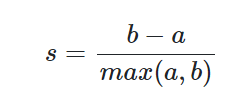

- a: The mean distance between a sample and all other points in the same class.

- b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

The coefficient can take values in the interval [-1, 1].

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters.

### 2. Variance Ratio Criterion <a class="anchor" id="12"></a>

Source: https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index

If the ground truth labels are not known, the Calinski-Harabasz index (sklearn.metrics.calinski_harabasz_score) - also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).


### 3. Davies-Bouldin Index <a class="anchor" id="13"></a>

Source: https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index

If the ground truth labels are not known, the Davies-Bouldin index can be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters.

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

# Data pre-processing <a class="anchor" id="14"></a>

Source: https://datascience.stackexchange.com/questions/80926/model-selection-in-clustering?noredirect=1#comment84748_80926

Just remember applying some scaling technique such as Standard or MinMax prior clustering, even you can use some manifold technique such as tSNE as preprocessing step since it has been shown to work for finding hidden structures on our data (stats.stackexchange.com/questions/263539/…) Additionally, I recommend using soft clustering techniques such as Gaussian Mixtures since in this way you will get a probability that a given point belongs to a cluster rather than only the label. It might be useful when making decisions on your data 

# Viewing clusters with more than 2 dimensional data <a class="anchor" id="15"></a>

Source: https://stats.stackexchange.com/questions/173820/how-to-plot-clusters-in-more-than-3-dimensions/173823#173823

You can use MDS(Multidimensional Scaling) for this. You can also use PCA but PCA works well with high correlation.

## MDS

Multidimensional Scaling (MDS) is a dimension-reduction technique designed to project high dimensional data down to 2 dimensions while preserving relative distances between observations. It can be used to look at higher dimensional data and try to find patterns or groupings. It is most useful when the observations are significant (e.g. if its a random sample of people, probably not useful; but if its all fish species found in a certain lake, it may be useful) and relatively small (basically to the limits of scatter plots).

## MDS vs PCA
Without getting too heavily into the theory behind MDS, note that you can define the distance however you want, and MDS with euclidean distance is equivalent to extracting two principal components from a PCA analysis. In general, other distance metrics can be used.

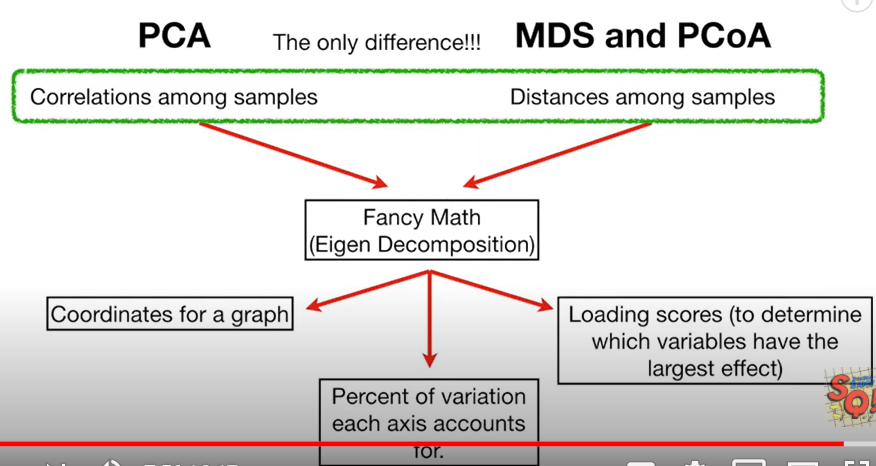

Video: https://youtu.be/GEn-_dAyYME

<img src="https://html.scirp.org/file/54748x7.png" width=700>